## Exercise 2

2a) The implementation of a PSO algorithm for a swarm with one individual

In [25]:
def fitness(x):
    return x ** 2

def update_rule(x, x_star, social_best, v, w, a1, a2, r1, r2):
    #The update rule can be optimized because there is only one individual
    return w*v + a1*r1*(x_star - x) + a2*r2*(social_best - x)

def update_pos(x, v):
    return x + v

def update_local_best(x, xnew):
    if fitness(x) > fitness(xnew):
        return xnew
    return x

def PSO(x, x_star, social_best, v, w, a1, a2, r1, r2, iterations):
    positions = [x]
    for i in range(0, iterations):
        v = update_rule(x, x_star, social_best, v, w, a1, a2, r1, r2)
        x = update_pos(x, v)
        x_star = update_local_best(x_star, x)
        social_best = x_star
        #print("Iteration " + str(i) + ": x = " + str(x) + ", f(x) = " + str(fitness(x)))
        positions.append(x)
    return positions

In [26]:
import matplotlib.pyplot as plt

def make_plots(positions1, positions2):
    plt.plot(list(range(len(positions1))), positions1, label = "1: ω = 0.5, α1 = α2 = 1.5, r1 = r2 = 0.5")
    plt.plot(list(range(len(positions2))), positions2, label = "2: ω = 0.7, α1 = α2 = 1.5, r1 = r2 = 1")
    plt.title("The trajectory of a single particle optimizing f(x) = x**2")
    plt.legend()
    plt.ylabel("fitness as sum of the bits")
    plt.xlabel("iteration")
    plt.show()

2b) Applying the algorithm on the given values and making the plots

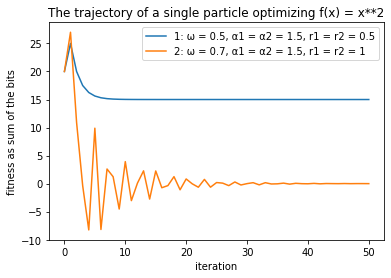

In [27]:
v = 10
x = 20

#First setting
w = 0.5
a1 = a2 = 1.5
r1 = r2 = 0.5
positions1 = PSO(x, x, x, v, w, a1, a2, r1, r2, 50)

#Second setting
w = 0.7
a1 = a2 = 1.5
r1 = r2 = 1
positions2 = PSO(x, x, x, v, w, a1, a2, r1, r2, 50)

make_plots(positions1, positions2)

Motivating plot for exercise 2c

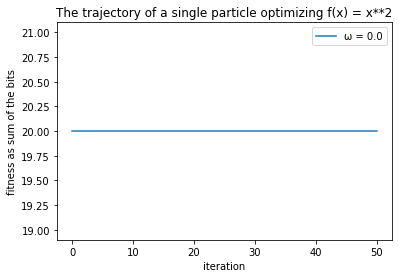

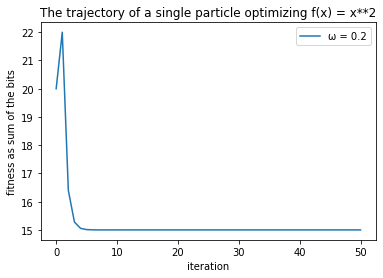

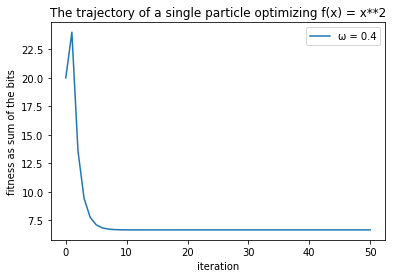

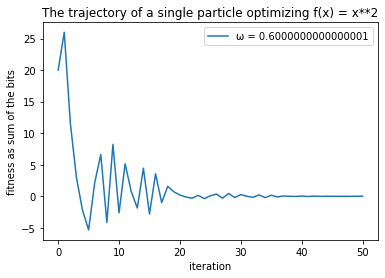

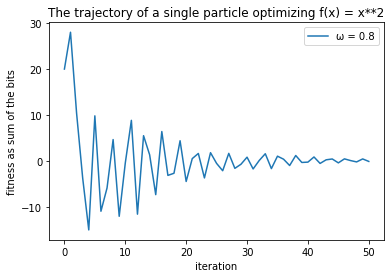

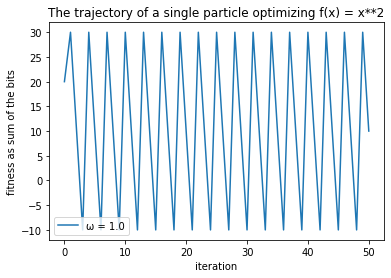

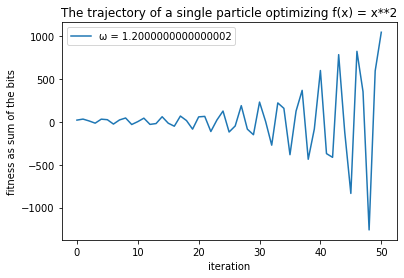

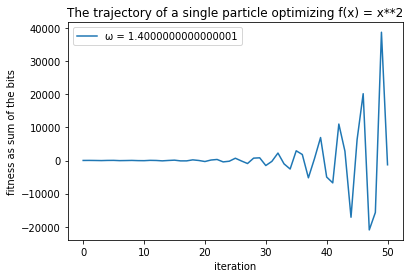

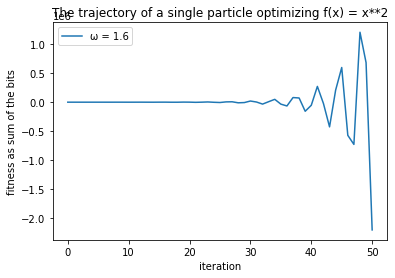

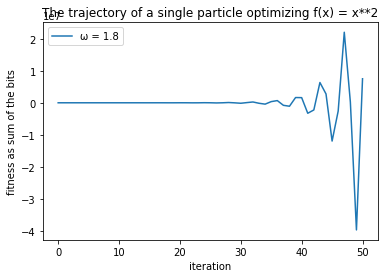

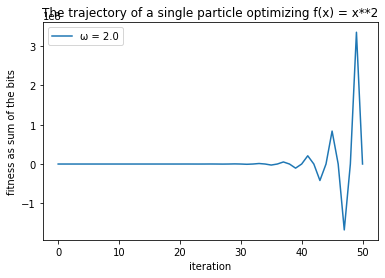

In [74]:
import numpy as np

def make_plot(positions1, w):
    plt.plot(list(range(len(positions1))), positions1, label = "ω = " + str(w))
    plt.title("The trajectory of a single particle optimizing f(x) = x**2")
    plt.legend()
    plt.ylabel("fitness as sum of the bits")
    plt.xlabel("iteration")
    plt.show()
    
w_list = list(np.arange(0,2.2,1/5))
positions_list = list(range(len(w_list)))
for w in w_list:
    positions1 = PSO(20, 20, 20, 10, w, 1.5, 1.5, 1, 1, 50)
    make_plot(positions1, w)